In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from numpy.random import randn
%matplotlib inline

# ダミーデータの作成です

In [2]:
ten = randn(2000) * 300 + 2000
kalist = ['内科', '整形外科', '神経内科', '産婦人科', '耳鼻咽喉科', '泌尿器科', '外科', '皮膚科', '眼科','脳神経外科', '小児科']
months = ["1610","1611","1612","1701","1702","1703"]

In [5]:
df = pd.DataFrame({'dpc_ten':ten})

In [12]:
df['ka'] =  [random.choice(kalist) for i in range(len(df))]
df['month'] = [random.choice(months) for i in range(len(df))]

In [14]:
df.head()

,dpc_ten,ka,month
0,2062.200387,整形外科,1610
1,2105.025425,耳鼻咽喉科,1701
2,1782.637066,神経内科,1612
3,1659.748830,外科,1703
4,1972.151423,眼科,1702


# データを集約します。月別のみの集約と、月別・科別の集約を作ってみましょう

In [16]:
df_agg = df.groupby('month')['dpc_ten'].agg(['mean','std','median'])
df_agg2 = df.groupby(['month','ka'])['dpc_ten'].agg(['mean','std','median'])

## まずは時系列の折れ線グラフにしてみます

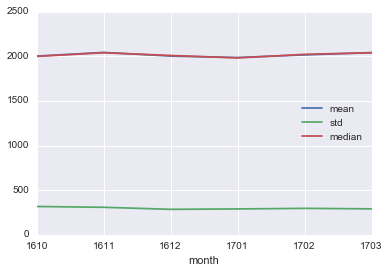

In [17]:
df_agg.plot()
#正規分布に従うデータなので、meanとmedianが重なっちゃってますね…

## 続いて月別推移を、科別に切り分けて表示します

In [19]:
df_agg2.reset_index(inplace=True)
#集約したデータはMulti_indexになります。df.plot()はよしなにしてくれますが、
#手動でデータを選択するには扱いづらいので、一度フラットに戻します。

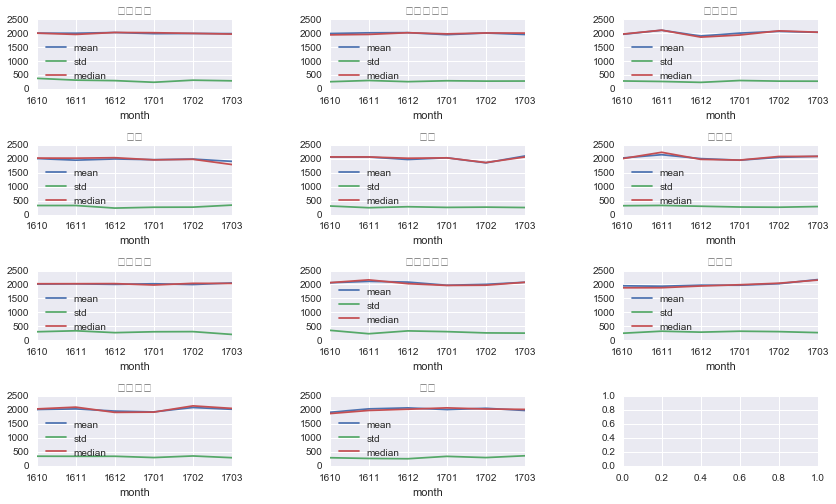

In [20]:
fig, axes = plt.subplots(4, 3, figsize=(14, 8))
plt.subplots_adjust(wspace=0.5, hspace=0.8)
for (ax, ka) in zip(axes.flatten(),df['ka'].unique()):
    ax = df_agg2[df_agg2['ka'] == ka].plot(x='month',ax=ax)
    ax.set_title(ka)

## うーん、フォントの設定がされていないので、日本語が□になってしまいました。

# ヒストグラムで分布を見てみます。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11bf70eb8>]], dtype=object)

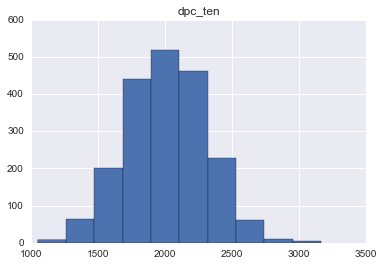

In [29]:
df.hist()
#まずは単純な通期の分布です。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11ee0a2b0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f730828>]], dtype=object)

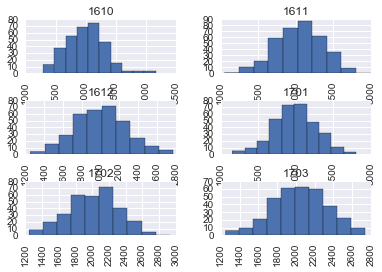

In [37]:
df.hist(column='dpc_ten',by='month')
#月別の分布を見てみましょう。byを指定するだけです。

# 最後に箱ひげ図を描きます。実データでは派手な外れ値が連発されて、綺麗に描画できません。
## まずは外れ値の除去を行います。

In [21]:
outlier = df['dpc_ten'].mean() + df['dpc_ten'].std() * 2

In [22]:
df_outed = df[df['dpc_ten'] < outlier]

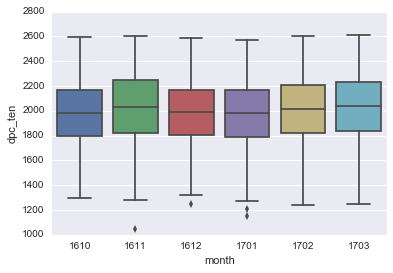

In [38]:
ax = sns.boxplot(x='month',y='dpc_ten',data=df_outed)